<a href="https://colab.research.google.com/github/deepanshijindal23/Spam-Message-Classifier-using-TF-IDF-and-Multinomial-Naive-Bayes-NLP-Project-/blob/main/Spam_email_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
from google.colab import files
_ = files.upload()


Saving intern1.csv to intern1 (3).csv


In [8]:
df = pd.read_csv("intern1.csv", encoding="latin-1")
df.columns = df.columns.str.strip().str.lower()
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['message'].astype(str).str.len().describe()

,message
count,5575.000000
mean,80.445202
std,59.842709
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [10]:
df['label'].unique()


array(['ham', 'spam', nan], dtype=object)

In [11]:
df['label'] = df['label'].astype(str).str.lower().str.strip()
df = df[df['label'].isin(['ham', 'spam'])]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['label'].describe()

,label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=None,token_pattern=r'(?u)\b\w+\b',min_df=1)

X = vectorizer.fit_transform(df['message'])
y = df['label']

X.shape

(5574, 8752)

In [13]:
df['message'] = df['message'].astype(str)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
y_train.isna().sum()


np.int64(0)

In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [17]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9596412556053812
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       954
           1       1.00      0.72      0.84       161

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



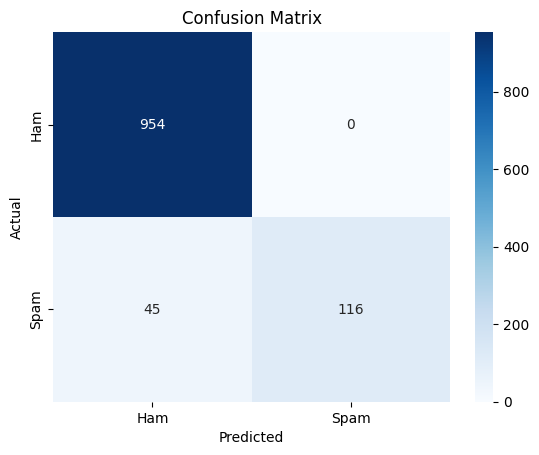

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [19]:
def predict_message(msg):
    msg_vec = vectorizer.transform([msg])
    pred = model.predict(msg_vec)
    return "Spam" if pred[0] == 1 else "Ham"

predict_message("Congratulations! You have won a free prize")


'Spam'

In [20]:
#more example

def check_message(text):
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)

    if prediction[0] == 0:
        return "HAM (Normal message)"
    else:
        return "SPAM"


In [21]:
check_message("Hey, are we still meeting today at 5 pm?")

'HAM (Normal message)'

In [22]:
check_message("Congratulations! You have won a free iPhone. Click now!")

'SPAM'